In [1]:
#Important imports
import torch
from torch import nn as nn
from torch.utils.data import DataLoader
from torch import optim 
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms,models
import matplotlib.pyplot as plt

#Choosing devide to be gpu if have one, else cpu
DEVICE = torch.device('cuda' if torch.cuda.is_available else 'cpu')  

c:\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [3]:
train_data = ImageFolder(r'C:\Users\vladi\OneDrive\Desktop\Sigmoid\CV\catndogs\data\training_set\training_set', transform = transformations)
test_data = ImageFolder(r'C:\Users\vladi\OneDrive\Desktop\Sigmoid\CV\catndogs\data\test_set\test_set', transform = transformations)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


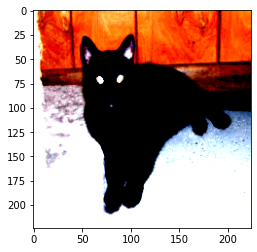

In [4]:
plt.imshow((train_data[10][0]).permute(1,2,0))

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # (224,224)
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding=1)
        
        self.pool1 = nn.MaxPool2d(2)
        
        # (112,112)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)
        
        self.pool2 = nn.MaxPool2d(2)
        
        # (56,56)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)
        
        self.pool3 = nn.MaxPool2d(2)
        # (28,28)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(128*28*28,256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,1)
    
    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        
        out = self.flatten(out)
        
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))
        
        return out

In [6]:
# Training loop for our network
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):

    #Initializing two lists to save accuracy to plot them later
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)

    #Going thru every epoch
    for epoch in range(n_epochs):

        #Going thru example, thru every batch, in our case, thru all data at once
        for example, labels in train_loader:     

            #Translating calculations to gpu if is available
            example = example.to(DEVICE)
            labels = labels.to(DEVICE)

            # ensuring equal number of dimensions for labels and examples
            labels  = labels.unsqueeze(1)

            # running our data thru our data - forward
            output = model(example.float())
            # Getting loss of our network right now
            loss = loss_fn(output, labels.float())

            # Zeroing the gradient to not stack it from other iterations
            optimizer.zero_grad()
            #Runing backward part of the neural network, getting gradiets
            loss.backward()
            #Updating our paramters
            optimizer.step()
            
            
        with torch.no_grad():
            
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total
                
        print(f'Epoch {epoch+1})', 
              f'Train Accuracy: {train_accuracy[epoch]}',
              f'Test Accuracy: {test_accuracy[epoch]}')

    #If set to True, print graph of train and validation loss
    if print_plot:

        #Setting x-ticks
        epochs = range(n_epochs)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [7]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle =True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle =True)

c:\python38\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1) Train Accuracy: 0.7099312543869019 Test Accuracy: 0.6920414566993713
Epoch 2) Train Accuracy: 0.7858837842941284 Test Accuracy: 0.7320810556411743
Epoch 3) Train Accuracy: 0.8587132692337036 Test Accuracy: 0.7780523300170898
Epoch 4) Train Accuracy: 0.9350405931472778 Test Accuracy: 0.7765694260597229
Epoch 5) Train Accuracy: 0.9711430072784424 Test Accuracy: 0.7790409922599792
Epoch 6) Train Accuracy: 0.9840099811553955 Test Accuracy: 0.7409787178039551
Epoch 7) Train Accuracy: 0.9948781728744507 Test Accuracy: 0.7622342705726624
Epoch 8) Train Accuracy: 0.9765146374702454 Test Accuracy: 0.7271378636360168
Epoch 9) Train Accuracy: 0.9815115332603455 Test Accuracy: 0.7375184893608093
Epoch 10) Train Accuracy: 0.9973766207695007 Test Accuracy: 0.7647058367729187


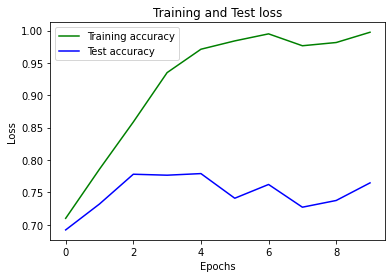

In [8]:
learning_rate = 1e-3 # 0.001

model = Net().to(DEVICE)

optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

In [ ]:
from collections import OrderedDict

model = models.resnet50(pretrained = True)

for param in model.parameters():
    param.required_grad = False
    
nr_feat = model.fc.in_features #2048
model.fc = nn.Sequential(OrderedDict([('fc',nn.Linear(nr_feat,1)),('sigmoid',nn.Sigmoid())]))

learning_rate = 1e-3
model = model.to(DEVICE)
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

#loss_fn = nn.BCEWithLogitsLoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

Epoch 1) Train Accuracy: 0.9088069796562195 Test Accuracy: 0.90706866979599
Epoch 2) Train Accuracy: 0.950281023979187 Test Accuracy: 0.9421650767326355
Epoch 3) Train Accuracy: 0.9252966642379761 Test Accuracy: 0.9080572724342346
Epoch 4) Train Accuracy: 0.9605246186256409 Test Accuracy: 0.9426593780517578
Epoch 5) Train Accuracy: 0.9691442847251892 Test Accuracy: 0.9431536793708801
Epoch 6) Train Accuracy: 0.9675202965736389 Test Accuracy: 0.9303014874458313
Epoch 7) Train Accuracy: 0.9736414551734924 Test Accuracy: 0.9416707158088684


In [ ]:
model